In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime  

In [2]:
# Prompt the user for the stock ticker symbol
stock_symbol = input("Enter the stock ticker symbol (e.g., AMD): ")

# Prompt the user for the start_date of the analysis
start_date = input("Enter the start date (YYYY-MM-DD): ")

# Get the end/current date
end_date = input("Enter the end date (YYYY-MM-DD, or press Enter for current date): ")
if not end_date:
    end_date = datetime.now().strftime('%Y-%m-%d')  #current date .now


# Convert start_date and end_date to datetime objects
start_date = datetime.strptime(start_date, '%Y-%m-%d')
end_date = datetime.strptime(end_date, '%Y-%m-%d')



Enter the stock ticker symbol (e.g., AMD): PLTR
Enter the start date (YYYY-MM-DD): 2021-01-01
Enter the end date (YYYY-MM-DD, or press Enter for current date): 


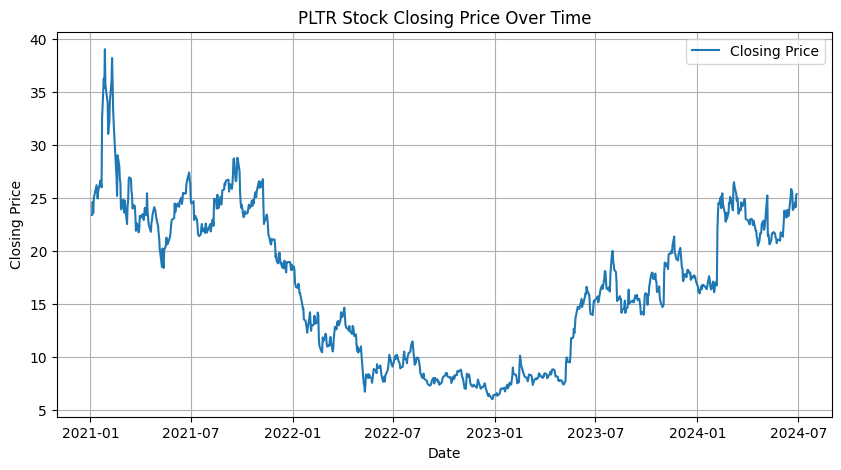

        Date       Open       High        Low      Close    Volume  Dividends  \
0 2021-01-04  23.910000  24.500000  22.500000  23.370001  44970400        0.0   
1 2021-01-05  23.180000  24.670000  22.889999  24.600000  29050400        0.0   
2 2021-01-06  24.120001  24.459999  23.250000  23.540001  32732900        0.0   
3 2021-01-07  24.020000  25.190001  23.670000  25.000000  32240000        0.0   
4 2021-01-08  25.700001  26.440001  24.700001  25.200001  41313800        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


In [3]:
# Download historical data for a stock
stock = yf.Ticker(stock_symbol)
historical_data = stock.history(period="max")

# Display the downloaded data
#stock_data.tail(20)

# Ensure the index is in datetime format and convert to timezone-naive
historical_data.index = pd.to_datetime(historical_data.index).tz_localize(None)

# Filter data between the start_date and end_date
historical_data = historical_data[(historical_data.index >= start_date) & (historical_data.index <= end_date)]

# Reset index to include the date column for plotting
historical_data.reset_index(inplace=True)

# Plot the closing price as a line chart
plt.figure(figsize=(10, 5))  # Set the figure size
plt.plot(historical_data['Date'], historical_data['Close'], label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title(f'{stock_symbol} Stock Closing Price Over Time')
plt.grid(True)
plt.legend()
plt.show()

# Display the downloaded data (optional)
print(historical_data.head())

